In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt
import pynq.lib.dma
from pynq import DefaultHierarchy, Overlay, Xlnk

In [2]:
class MemoryDriver(DefaultHierarchy):
    def __init__(self, description):
        super().__init__(description)

    def execute(self, img):
        in_buffer = Xlnk().cma_array(
            shape=(img.shape[0] * img.shape[1]), dtype=np.uint8)
        out_buffer = Xlnk().cma_array(
            shape=(img.shape[0] * img.shape[1]), dtype=np.uint8)
        for i, v in enumerate(np.reshape(img, (img.shape[0] * img.shape[1]))):
            in_buffer[i] = v
        self.axi_dma_0.sendchannel.transfer(in_buffer)
        self.axi_dma_0.recvchannel.transfer(out_buffer)
        self.axi_dma_0.sendchannel.wait()
        self.axi_dma_0.recvchannel.wait()
        result = np.reshape(out_buffer, img.shape)
        return result

    @staticmethod
    def checkhierarchy(description):
        if 'axi_dma_0' in description['ip']:
            return True
        return False

In [3]:
overlay = Overlay('mean_512.bit')

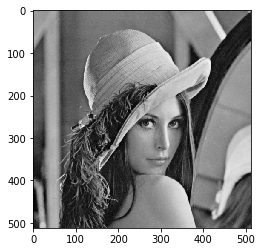

In [4]:
img = cv2.imread('lena.png', 0)
plt.figure(figsize=(4, 4))
plt.imshow(img, 'gray')

In [5]:
%%time
result = overlay.memory.execute(img)

CPU times: user 590 ms, sys: 10 ms, total: 600 ms
Wall time: 641 ms


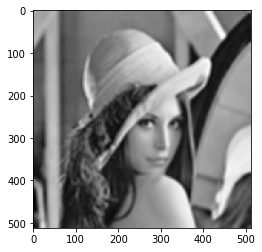

In [6]:
plt.figure(figsize=(4, 4))
plt.imshow(result, 'gray')